In [1]:
#-*-coding:utf-8-*-

%load_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import pandas as pd

import torch
from torch.utils.data import DataLoader
import torchvision

import cv2

import copy

import time

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
%matplotlib inline

__ROOT_PATH = os.path.abspath('../../')
sys.path.append(__ROOT_PATH)

matplotlib.rcParams['figure.facecolor'] = 'w'

In [355]:
from scgan.util.color import color_gray_image
from scgan.loader.colored_mnist_loader import ColoredMnistDataset

In [2]:
DATA_ROOT = os.path.join(__ROOT_PATH, "data/")

In [25]:
mnist_train_dataset = torchvision.datasets.MNIST(root=DATA_ROOT, train=True, download=True,
                                                 transform=torchvision.transforms.ToTensor())
mnist_test_dataset = torchvision.datasets.MNIST(root=DATA_ROOT, train=False, download=True,
                                                 transform=torchvision.transforms.ToTensor())

In [229]:
train_images, train_labels = list(zip(*mnist_train_dataset))
train_images = torch.cat(train_images, dim=0).unsqueeze(-1).expand(-1, -1, -1, 3).numpy()
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)

test_images, test_labels = list(zip(*mnist_test_dataset))
test_images = torch.cat(test_images, dim=0).unsqueeze(-1).expand(-1, -1, -1, 3).numpy()
test_labels = np.array(test_labels)
print(test_images.shape, test_labels.shape)

(60000, 28, 28, 3) (60000,)
(10000, 28, 28, 3) (10000,)


In [320]:
train_colored_images = np.zeros_like(train_images)
train_colors = []
for iimage, image in enumerate(train_images):
    random_color = (0, 0, 0)
    while random_color[0] + random_color[1] + random_color[2] < 255:
        random_color = (np.random.randint(256), np.random.randint(256), np.random.randint(256))
    train_colored_images[iimage] = color_gray_image(image, random_color)
    train_colors.append(list(random_color))
train_colors = np.array(train_colors)
print(train_colored_images.shape, train_colors.shape)

test_colored_images = np.zeros_like(test_images)
test_colors = []
for iimage, image in enumerate(test_images):
    random_color = (0, 0, 0)
    while random_color[0] + random_color[1] + random_color[2] < 255:
        random_color = (np.random.randint(256), np.random.randint(256), np.random.randint(256))
    test_colored_images[iimage] = color_gray_image(image, random_color)
    test_colors.append(list(random_color))
test_colors = np.array(test_colors)
print(test_colored_images.shape, test_colors.shape)

(60000, 28, 28, 3) (60000, 3)
(10000, 28, 28, 3) (10000, 3)


In [321]:
train_data = dict()
train_data['gray_image'] = train_images
train_data['colored_image'] = train_colored_images
train_data['label'] = train_labels
train_data['color'] = train_colors
np.savez(os.path.join(DATA_ROOT, 'colored_mnist/train.npz'), **train_data)

test_data = dict()
test_data['gray_image'] = test_images
test_data['colored_image'] = test_colored_images
test_data['label'] = test_labels
test_data['color'] = test_colors
np.savez(os.path.join(DATA_ROOT, 'colored_mnist/test.npz'), **test_data)

In [322]:
train_data = dict(np.load(os.path.join(DATA_ROOT, 'colored_mnist/train.npz')))
test_data = dict(np.load(os.path.join(DATA_ROOT, 'colored_mnist/test.npz')))

51058
8 [ 97 177 159]


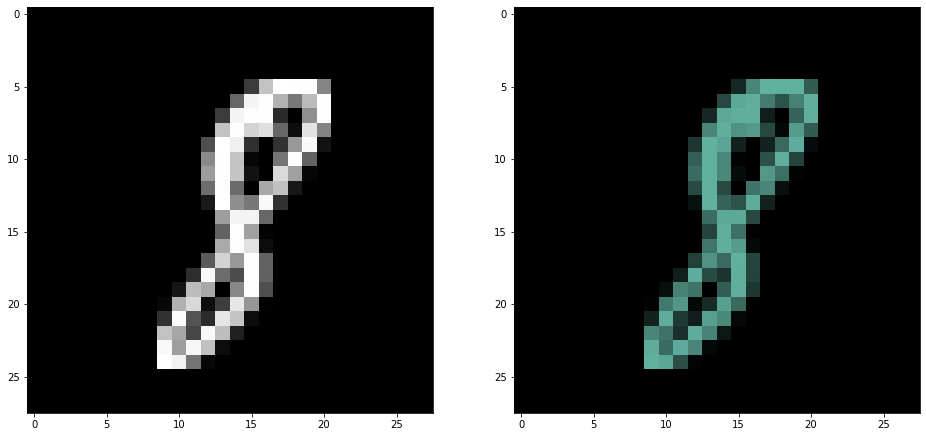

In [325]:
data = train_data
index = np.random.randint(len(data['label']))

print(index)
print(data['label'][index], data['color'][index])

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(data['gray_image'][index])
ax = fig.add_subplot(1, 2, 2)
plt.imshow(data['colored_image'][index])
plt.show()

In [356]:
train_dataset = ColoredMnistDataset(root=DATA_ROOT, train=True)
test_dataset = ColoredMnistDataset(root=DATA_ROOT, train=False)
print(len(train_dataset), len(test_dataset))

60000 10000


In [363]:
from torch import nn

nn.MSELoss()(torch.ones(5, 2), torch.zeros(5, 2))

tensor(1.)

39363
0 4
[0. 0. 0.] [0.13333334 0.85490197 0.92941177]


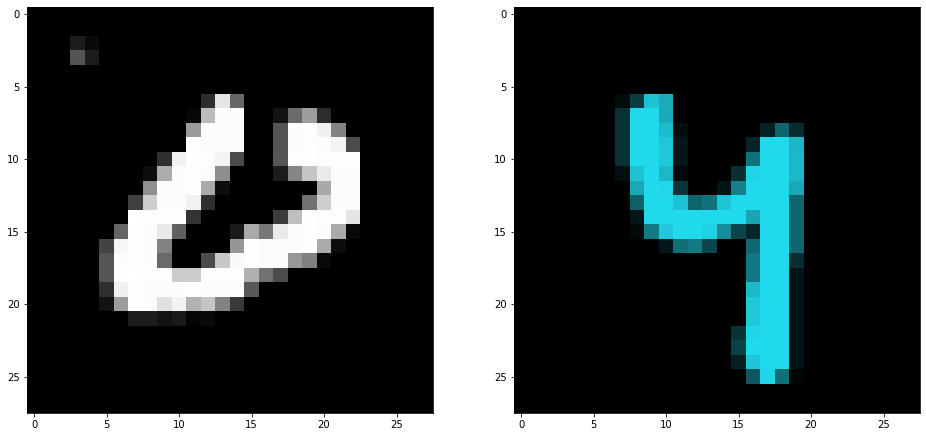

In [358]:
dataset = train_dataset
index = np.random.randint(len(dataset))

print(index)
print(dataset[index]['y1'].item(), dataset[index]['y2'].item())
print(dataset[index]['c1'].numpy(), dataset[index]['c2'].numpy())

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(dataset[index]['x1'].numpy().transpose(1, 2, 0))
ax = fig.add_subplot(1, 2, 2)
plt.imshow(dataset[index]['x2'].numpy().transpose(1, 2, 0))
plt.show()